# matplotlib

matplotlib也是python的一個library，主要是做基本的資料視覺化功能
我們將會介紹以下主題
1. 2D繪圖
2. 3D繪圖

import library  
其中<font color='green'>%matplotlib inline </font>能把圖形直接印在筆記本上

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
np.random.seed(1000)
y = np.random.standard_normal(20)

pyplot中的plot函數是最基礎的繪圖函數，他需要兩個數值
+ x值: List
+ y值: List  

當然，x值和y值的數量必須相等

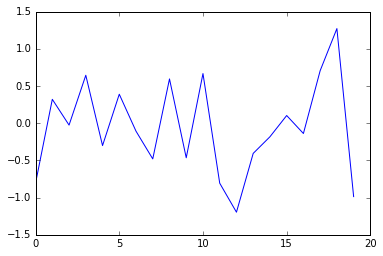

In [3]:
x = range(len(y))
plt.plot(x, y)

若沒有給x值，plot會以索引值對應x值

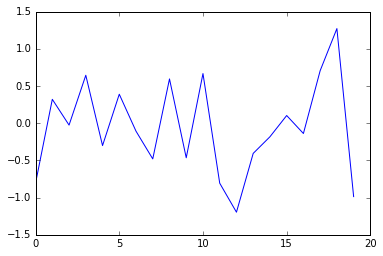

In [4]:
plt.plot(y)

也可以附加method，ndarray return的物件大多是ndarray

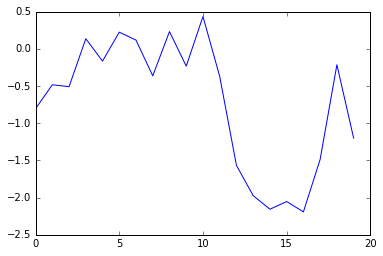

In [5]:
plt.plot(y.cumsum())

可以使用客製化的一些method

(-3.1915310617211072, 1.4342209788376488)

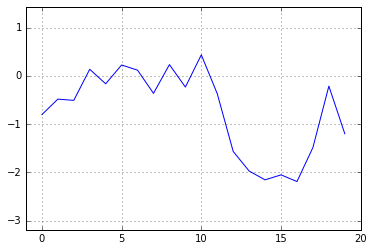

In [6]:
plt.plot(y.cumsum())
plt.grid(True) #有網格
plt.xlim(-1, 20) #軸的最大值和最小值
plt.ylim(np.min(y.cumsum()) - 1, np.max(y.cumsum()) + 1)

為了達到更好的理解性，圖表通常包含一些標籤，例如描述x和y值的性質的標籤，這些標籤可以分別透過<font color="green">plt.title</font>, <font color="green">plt.xlabe</font>, <font color="green">plt.ylabe</font>設定

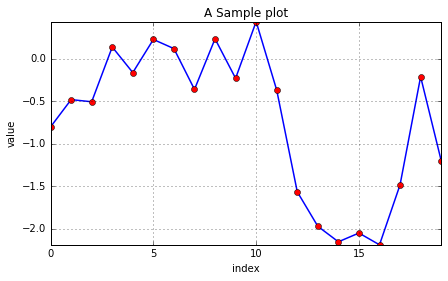

In [7]:
plt.figure(figsize=(7, 4)) #設定圖案比例
plt.plot(y.cumsum(), 'b', lw=1.5) #藍色線寬1.5
plt.plot(y.cumsum(), 'ro') #紅色的點
plt.grid(True)
plt.axis('tight') #使所有資料可見
plt.xlabel('index')
plt.ylabel('value')
plt.title('A Sample plot')

<center>標準顏色縮寫，其餘請自行Google</center>

| 字元 | 顏色 |
|------|------|
| b    | 藍   |
| g    | 綠   |
| r    | 紅   |
| c    | 青   |
| m    | 品紅 |
| y    | 黃   |
| k    | 黑   |
| w    | 白   |

二維資料

In [8]:
np.random.seed(2000)
y = np.random.standard_normal((20, 2)).cumsum(axis=0)

In [9]:
y[:5]

array([[ 1.73673761,  1.89791391],
       [-0.37003581,  1.74900181],
       [ 0.21302575, -0.51023122],
       [ 0.35026529, -1.21144444],
       [-0.27051479, -1.6910642 ]])

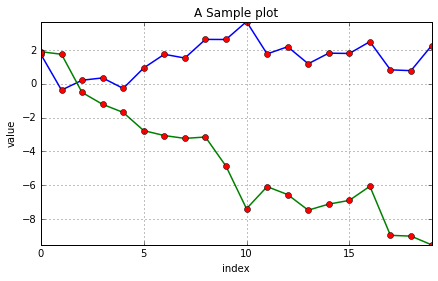

In [10]:
plt.figure(figsize=(7, 4))
plt.plot(y, lw=1.5)
plt.plot(y, 'ro')
plt.grid(True)
plt.axis('tight') #使所有資料可見
plt.xlabel('index')
plt.ylabel('value')
plt.title('A Sample plot')

為了進一步更好瞭解圖表，每個資料的標籤在圖例中列出，<font color="green">plt.legend</font>接受不同位置的參數，其中0代表「最佳位置」，也就是盡量不被擋到的位置

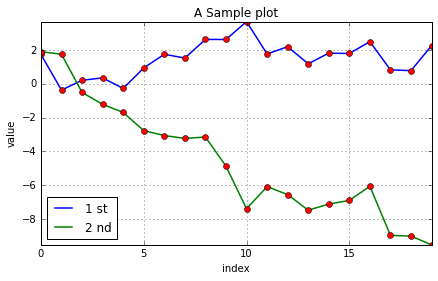

In [11]:
plt.figure(figsize=(7, 4))
plt.plot(y[:, 0], lw=1.5, label='1 st')
plt.plot(y[:, 1], lw=1.5, label='2 nd')
plt.plot(y, 'ro')
plt.grid(True)
plt.legend(loc=0)
plt.axis('tight') #使所有資料可見
plt.xlabel('index')
plt.ylabel('value')
plt.title('A Sample plot')

然而，數據常常有不同的刻度，有時候會導致視覺化訊息丟失，例如我們將y軸第一個資料放大一百倍

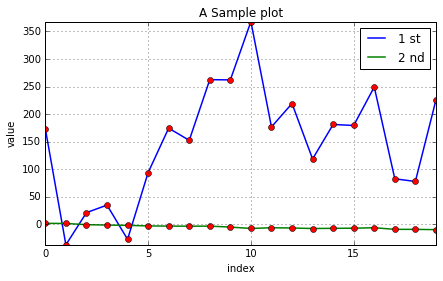

In [12]:
y[:, 0] = 100 * y[:, 0]
plt.figure(figsize=(7, 4))
plt.plot(y[:, 0], lw=1.5, label='1 st')
plt.plot(y[:, 1], lw=1.5, label='2 nd')
plt.plot(y, 'ro')
plt.grid(True)
plt.legend(loc=0)
plt.axis('tight') #使所有資料可見
plt.xlabel('index')
plt.ylabel('value')
plt.title('A Sample plot')

解決這種問題有兩個辦法
+ 使用兩個y軸 (左/右)
+ 使用兩個圖案

首先，先用兩個y軸

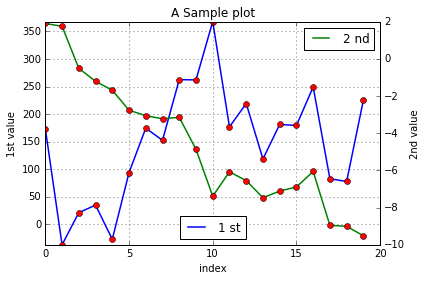

In [13]:
fig, ax1 = plt.subplots()
plt.plot(y[:, 0], lw=1.5, label='1 st')
plt.plot(y[:, 0], 'ro')
plt.grid(True)
plt.legend(loc=8)
plt.axis('tight') #使所有資料可見
plt.xlabel('index')
plt.ylabel('1st value')
plt.title('A Sample plot')
ax2 = ax1.twinx()
plt.plot(y[:, 1], 'g', lw=1.5, label='2 nd')
plt.plot(y[:, 1], 'ro')
plt.legend(loc=0)
plt.ylabel('2nd value')

顯示兩個圖

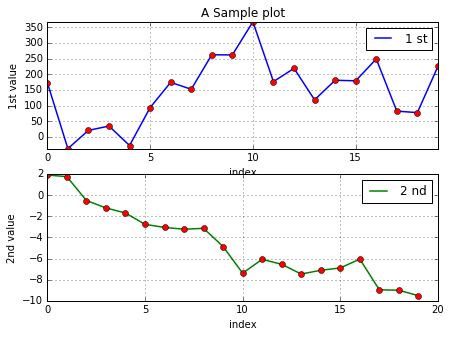

In [14]:
plt.figure(figsize=(7, 5))
plt.subplot(211)
plt.plot(y[:, 0], lw=1.5, label='1 st')
plt.plot(y[:, 0], 'ro')
plt.grid(True)
plt.legend(loc=0)
plt.axis('tight') #使所有資料可見
plt.xlabel('index')
plt.ylabel('1st value')
plt.title('A Sample plot')
plt.subplot(212)
plt.plot(y[:, 1], 'g', lw=1.5, label='2 nd')
plt.plot(y[:, 1], 'ro')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('index')
plt.ylabel('2nd value')

<font color="green">plt.subplot</font>有三個參數，即<font color="green">numrows</font>, <font color="green">numcols</font>, <font color="green">fignum</font>(1 ~ numrows * numcols)  
例如9個大小相同的子圖的圖表有numrows = 3, numcols=3, fignum = 1

有時候，選擇兩個不同圖表來視覺化數據是必要的，以下示範線性圖和柱狀圖

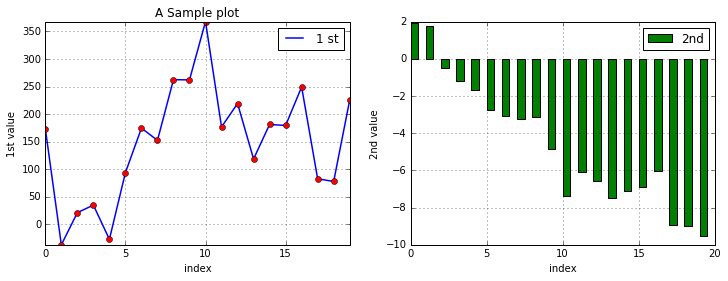

In [15]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(y[:, 0], lw=1.5, label='1 st')
plt.plot(y[:, 0], 'ro')
plt.grid(True)
plt.legend(loc=0)
plt.axis('tight') #使所有資料可見
plt.xlabel('index')
plt.ylabel('1st value')
plt.title('A Sample plot')
plt.subplot(122)
plt.bar(np.arange(len(y)), y[: ,1], width=0.5, color='g', label='2nd')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('index')
plt.ylabel('2nd value')

### 其他繪圖樣式

對於二維繪圖，線性圖和點圖是金融學中最重要的，因為許多資料都是時間序列的數據  
我們介紹的第一種圖表是散點圖，這種圖表類型可以繪製一個金融時間序列的收益和另一個時間序列收益的對比

In [16]:
y = np.random.standard_normal((1000, 2))

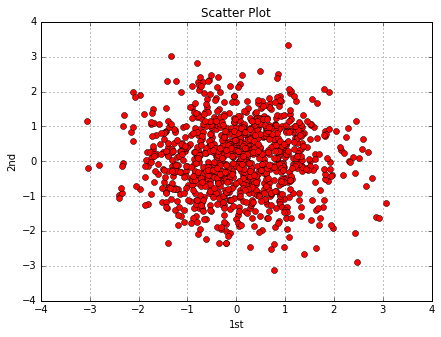

In [17]:
plt.figure(figsize=(7, 5))
plt.plot(y[:, 0], y[:, 1], 'ro')
plt.grid(True)
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot')

使用scatter繪製

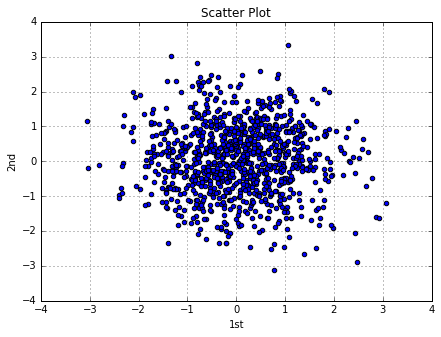

In [18]:
plt.figure(figsize=(7, 5))
plt.scatter(y[:, 0], y[:, 1], marker='o')
plt.grid(True)
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot')

scatter可以加入第三維，用不同顏色進行視覺化，並用彩條描述

In [19]:
c = np.random.randint(0, 10, len(y))

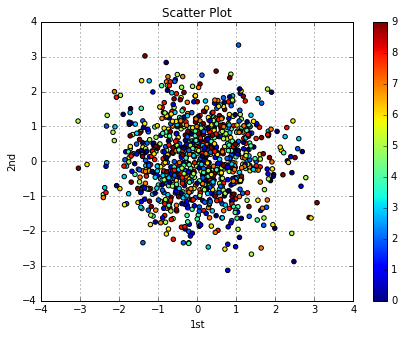

In [20]:
plt.figure(figsize=(7, 5))
plt.scatter(y[:, 0], y[:, 1],c=c, marker='o')
plt.colorbar()
plt.grid(True)
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot')

另外一種直方圖，常常用於金融的收益中

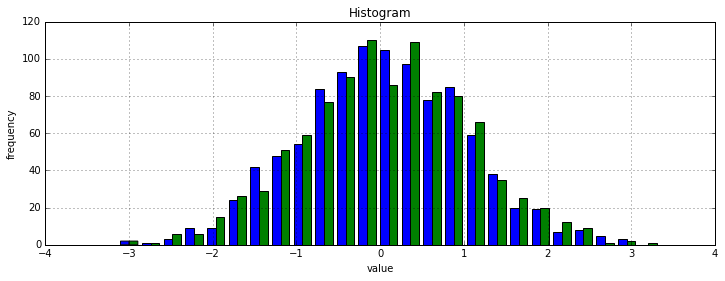

In [21]:
plt.figure(figsize=(12, 4))
plt.hist(y, label=['1st','2nd'], bins=25)
plt.grid(True)
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('Histogram')

堆疊版

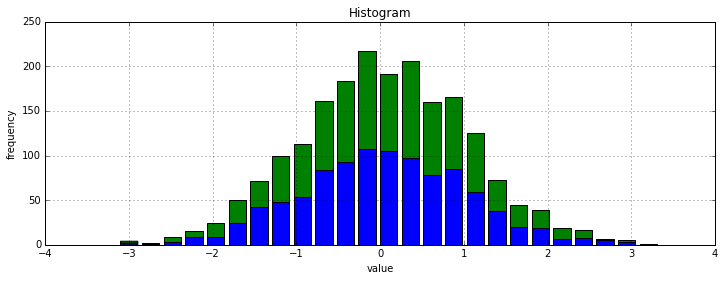

In [22]:
plt.figure(figsize=(12, 4))
plt.hist(y, label=['1st','2nd'], color=['b', 'g'],stacked=True, bins=25)
plt.grid(True)
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('Histogram')

還有另一種常用的是箱型圖，他的特色是容易比較多個data set

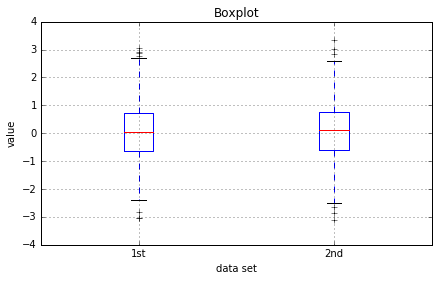

In [23]:
fig, ax = plt.subplots(figsize=(7, 4))
plt.boxplot(y)
plt.setp(ax, xticklabels=['1st','2nd'])
plt.grid(True)
plt.xlabel('data set')
plt.ylabel('value')
plt.title('Boxplot')

在圖表中加入數學公式

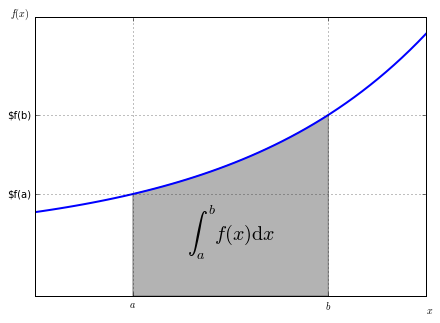

In [24]:
from matplotlib.patches import Polygon
def func(x):
    return 0.5 * np.exp(x) + 1

a, b = 0.5, 1.5 #積分的上界和下界
x = np.linspace(0, 2) #return 0到2之間50個數字的list
y = func(x)

fig, ax = plt.subplots(figsize=(7, 5))
plt.plot(x, y, 'b', linewidth=2)
plt.ylim(ymin = 0)

Ix = np.linspace(a, b)
Iy = func(Ix)
verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly) #生成陰影

plt.text(0.5 * (a + b), 1, r"$\int_a^b f(x)\mathrm{d}x$", horizontalalignment='center', fontsize=20)

plt.figtext(0.9, 0.075, '$x$')
plt.figtext(0.075, 0.9, '$f(x)$')

ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([func(a), func(b)])
ax.set_yticklabels(('$f(a)', '$f(b)'))
plt.grid(True)

### 金融學圖表
matplotlib還提供了少去精選的特書金融圖表，例如蠋柱圖主要用於歷史股價數據視覺化

In [25]:
import matplotlib.finance as mpf

他可以簡單的從[Yahoo財金網站](http://finance.yahoo.com)讀取歷史股價數據，只需要起始和結束日期，和對應的股票代碼，範例為蘋果歷史股價

In [26]:
start = (2014, 5, 1)
end = (2014, 6, 30)

quotes = mpf.quotes_historical_yahoo_ohlc('AAPL', start, end) #以時間、開盤(o)、最高(h)、最低(l)、收盤價(c)排序

順帶一提，如果公司被買走或不存在，就會出錯，例如Yahoo O_Q

[None, None, None, None, None, None, None, None, None]

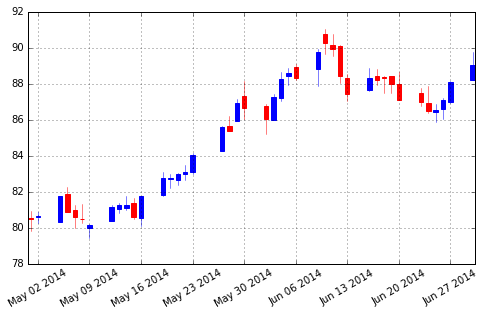

In [27]:
fig, ax = plt.subplots(figsize=(8, 5))
fig.subplots_adjust(bottom=0.2)
mpf.candlestick_ohlc(ax, quotes, width=0.6, colorup='b', colordown='r') #藍色上揚，紅色下跌
plt.grid(True)
ax.xaxis_date()
ax.autoscale_view()
plt.setp(plt.gca().get_xticklabels(), rotation=30) #將x軸旋轉30度

[None, None, None, None, None, None, None, None, None, None]

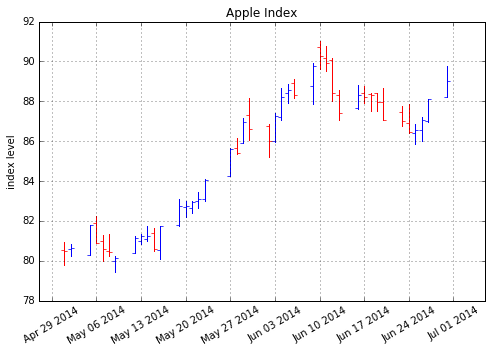

In [28]:
fig, ax = plt.subplots(figsize=(8, 5))
mpf.plot_day_summary_ohlc(ax, quotes, colorup='b', colordown='r')
plt.grid(True)
ax.xaxis_date()
plt.title('Apple Index')
plt.ylabel('index level')
plt.setp(plt.gca().get_xticklabels(), rotation=30) #將x軸旋轉30度

股價數據往往需要和成交量數據作和和，以提供市場活動的相關訊息

In [29]:
quotes = np.array(mpf.quotes_historical_yahoo_ohlc('AAPL', start, end))

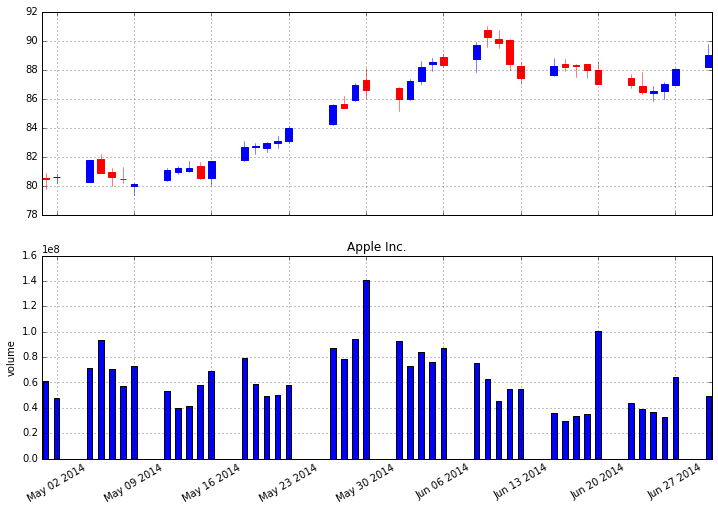

In [30]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12, 8))
mpf.candlestick_ohlc(ax1, quotes, width=0.6, colorup='b', colordown='r')
plt.title('Apple Inc.')
plt.ylabel('index level')
ax1.grid(True)
ax1.xaxis_date()
plt.bar(quotes[:,0] - 0.25, quotes[:, 5], width=0.5)
ax2.set_ylabel('volume')
ax2.grid(True)
ax.autoscale_view()
ax2.xaxis_date()
_ = plt.setp(plt.gca().get_xticklabels(), rotation=30)

### 3D繪圖

金融中3D視覺化應用的領域不多，但是波動率平面是一個應用領域，他可以同時展示許多到期日和行權價的隱含波動率(根據最新的價格預測的波動率)，在下面的例子中，我們人為生成一個類似波動率(金融資產一段時間的變化性)平面的圖表，考慮以下因素
+ 行權價格在50 ~ 150元之間
+ 到期日在0.5 ~ 2.5年之間  

我們可以用Numpy的meshgrid函數生成這樣的座標

In [31]:
strike = np.linspace(50, 150, 24) #50~150之間生成24個數值的一維坐標
ttm = np.linspace(0.5, 2.5, 24)
strike, ttm = np.meshgrid(strike, ttm) #1*24的一維坐標變成24*24的二維座標，並重複原始座標

In [32]:
strike[:3]

array([[  50.        ,   54.34782609,   58.69565217,   63.04347826,
          67.39130435,   71.73913043,   76.08695652,   80.43478261,
          84.7826087 ,   89.13043478,   93.47826087,   97.82608696,
         102.17391304,  106.52173913,  110.86956522,  115.2173913 ,
         119.56521739,  123.91304348,  128.26086957,  132.60869565,
         136.95652174,  141.30434783,  145.65217391,  150.        ],
       [  50.        ,   54.34782609,   58.69565217,   63.04347826,
          67.39130435,   71.73913043,   76.08695652,   80.43478261,
          84.7826087 ,   89.13043478,   93.47826087,   97.82608696,
         102.17391304,  106.52173913,  110.86956522,  115.2173913 ,
         119.56521739,  123.91304348,  128.26086957,  132.60869565,
         136.95652174,  141.30434783,  145.65217391,  150.        ],
       [  50.        ,   54.34782609,   58.69565217,   63.04347826,
          67.39130435,   71.73913043,   76.08695652,   80.43478261,
          84.7826087 ,   89.13043478,   93.478

In [33]:
iv = (strike - 100) ** 2 / (100 * strike) / ttm #產生模擬的隱含波動率

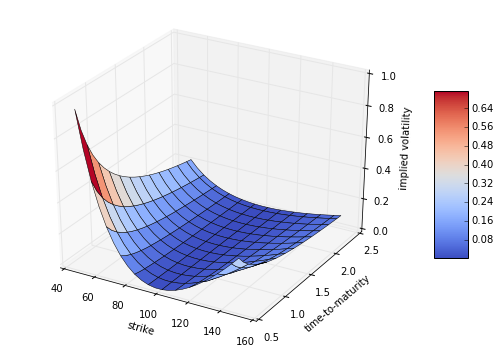

In [34]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(strike, ttm, iv, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)

ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity') #到期日
ax.set_zlabel('implied volatility')

fig.colorbar(surf, shrink=0.5, aspect=5)

也可以用點圖

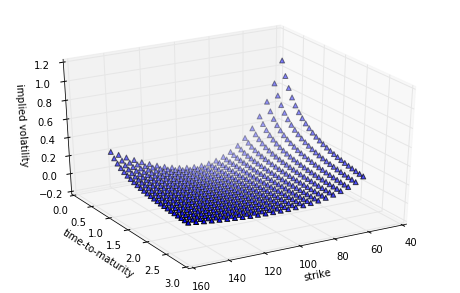

In [35]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 60) #設置視角

ax.scatter(strike, ttm, iv, zdir='z', s=25, c = 'b', marker='^')

ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity') #到期日
ax.set_zlabel('implied volatility')

matplotlib網站有有一個gallary，裡面有許多視覺化實作範例 [http://matplotlib.org/gallery.html](http://matplotlib.org/gallery.html)